In [8]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings. filterwarnings("ignore") 

Reading Election Data and India map file(.shp file)

In [9]:
election_data= pd.read_csv("Datasets\General Election Data.csv")

india_map= gpd.read_file("India Map\India Map 1977\india_map_1977.shp")

poverty_data_77= pd.read_csv("Datasets\Poverty data 1977-78.csv", skiprows=5, skipfooter=17,names=["states", "rural_absolute", "rural_precentage", "urban_absolute","urban_precentage", "combined_absolute", "combained_precentage" ])
poverty_data_73= pd.read_csv("Datasets\Poverty data 1972-73.csv", skiprows=5, skipfooter=12,names=["states", "rural_absolute", "rural_precentage", "urban_absolute","urban_precentage", "combined_absolute", "combained_precentage" ])

poverty_data_73.set_index("states", inplace=True)
poverty_data_77.set_index("states", inplace=True)

In [10]:
#Calculating state-wise average vote share of Congress candidates in 1971 election
inc_1971=election_data[(election_data['Year']==1971) & (election_data["Party"]=="INC")]         
inc_1971=inc_1971.groupby("State_Name")

inc_1971= inc_1971.Vote_Share_Percentage.agg(np.mean)


#Calculating state-wise average vote share of Congress candidates in 1977 election
inc_1977=election_data[(election_data['Year']==1977) & (election_data["Party"]=="INC")]         
inc_1977=inc_1977.groupby("State_Name")

inc_1977= inc_1977.Vote_Share_Percentage.agg(np.mean)



<AxesSubplot:>

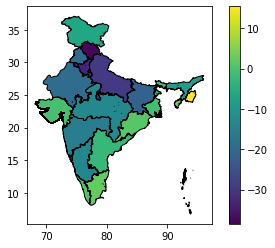

In [11]:
#Calculating diffrence in state-wise average vote share among the 1971 and 1977 election
vote_diff= inc_1977 - inc_1971
india_map=india_map.merge(vote_diff.to_frame(), left_on="States", right_on="State_Name")
india_map.plot(column='Vote_Share_Percentage',edgecolor="black", legend=True)

# calculating reduction poverty with 1972-73 data and 1977-78 data

<AxesSubplot:>

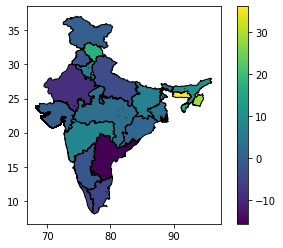

In [12]:
poverty_diff= poverty_data_77["combained_precentage"] - poverty_data_73["combained_precentage"] 

india_map= india_map.merge(poverty_diff, left_on="States", right_on="states")

india_map.plot(column="combained_precentage", legend=True, edgecolor="black")

In [34]:

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))
        


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


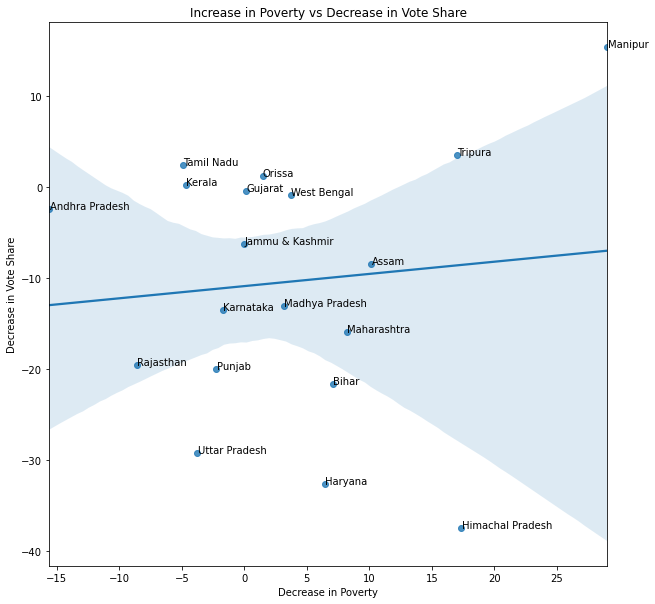

In [14]:
fig, ax=plt.subplots(figsize=(10,10))

sns.regplot(y=vote_diff.filter(items=poverty_diff.index), x=poverty_diff.filter(items=vote_diff.index), ax=ax )

plt.title("Increase in Poverty vs Decrease in Vote Share")
plt.xlabel("Decrease in Poverty")
plt.ylabel("Decrease in Vote Share")


label_point( poverty_diff.filter(items=vote_diff.index),vote_diff.filter(items=poverty_diff.index),
              pd.Series(vote_diff.index, index=list(vote_diff.index)), ax)

We can barely see any correlation is the the above plot. 

### Who voted for Ms. Gandhi, rich or poor?
    It is commonly believed that rich states voted for Ms. Gandhi or in favor of of Emergency in 1977 election. The below chart seems to suggest the opposite. While the vote share of congress came down everywhere except 4 states, the decline in vote share is much more steeper in rich states(or states with relatively lower poverty) than in poor states (or states with relatively higher poverty). 
    

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


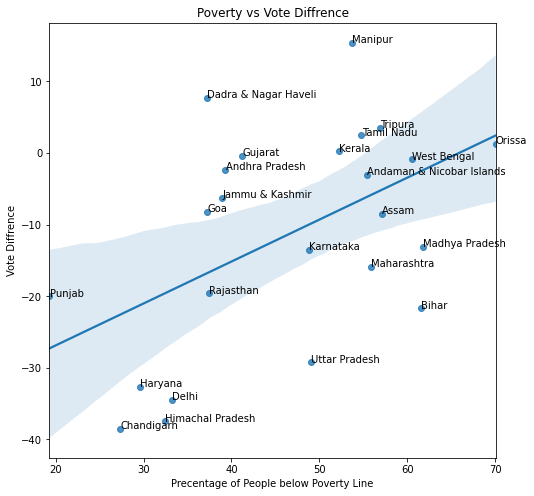

In [47]:
india_map= gpd.read_file("India Map\India Map 1977\india_map_1977.shp")

india_map=india_map.merge(poverty_data_77["combained_precentage"], left_on="States", right_on="states")
india_map=india_map.merge(inc_1977, left_on="States", right_on="State_Name" )
india_map=india_map.merge(vote_diff, left_on="States", right_on="State_Name", )

india_map.rename(columns={"Vote_Share_Percentage_x":"vote_share_1977", "Vote_Share_Percentage_y":"vote_diff"}, inplace=True)

plt.figure(figsize=(8,8))
ax=sns.regplot(data=india_map, x="combained_precentage", y="vote_diff")
plt.title("Poverty vs Vote Diffrence")
plt.xlabel("Precentage of People below Poverty Line")
plt.ylabel("Vote Diffrence")

label_point(india_map["combained_precentage"], india_map["vote_diff"], india_map.States, ax=ax )